In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding product_type
y = LabelEncoder().fit_transform(df['product_type'].astype(str))

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.47      0.54        40
           1       0.41      0.41      0.41        41
           2       0.63      0.66      0.65        79
           3       0.90      0.83      0.86        42
           4       0.37      0.45      0.40        40

    accuracy                           0.58       242
   macro avg       0.59      0.57      0.57       242
weighted avg       0.60      0.58      0.59       242



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extracting product type labels
product_type_columns = [col for col in df.columns if col.startswith('product_type_')]
y = df[product_type_columns].values.argmax(axis=1)  # Convert one-hot encoding to single labels

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training XGBoost Classifier

xgb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))






XGBoost Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        40
           1       0.47      0.44      0.46        41
           2       0.58      0.63      0.61        79
           3       0.85      0.83      0.84        42
           4       0.44      0.53      0.48        40

    accuracy                           0.60       242
   macro avg       0.62      0.60      0.60       242
weighted avg       0.62      0.60      0.61       242



## Support Vector Machine (SVM)

Support Vector Machine (SVM) is one of the most notable supervised machine learning algorithms, it was designed to classify data by finding the most ideal boundary between different attributes. Unlike some other models that might get distracted by noise or additional details, SVM focuses on the most important data points which are the ones that are closest to the boundary to ensure that the systems decisions are made in a clear and precise way. By maximizing the margin between categories, SVM improves accuracy and make classification task reliable.

### Justification

We chose to implement SVM because of the following reasons: 

1.	The Glowlytic recommendation system takes into consideration multiple attributes, including skin type, product type, brand, and notable effects. Also, SVM’s ability to work well in high-dimensional spaces makes sure that all these factors are taken into account for accurate recommendations.

2.	Since our system relies on a curated datasets and a massive amount of data, SVM makes an ideal choice. It promises high accuracy even with a smaller dataset, and outperforms other models that need extensive training data to be effective.

3.	Unlike models that may struggle with new inputs, SVM has balance by having clear decision boundaries. This makes it have less tendency to overfit  and ensures that recommendations remain the same across different users.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Ensure confusion_matrix is imported
from sklearn.svm import SVC

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extracting product type labels
product_type_columns = [col for col in df.columns if col.startswith('product_type_')]
y = df[product_type_columns].values.argmax(axis=1)  # Convert one-hot encoding to single labels

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training SVM Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # Try 'linear' or 'poly' for different results
svm_classifier.fit(X_train, y_train)

# Making predictions
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        40
           1       0.46      0.41      0.44        41
           2       0.59      0.73      0.65        79
           3       0.85      0.81      0.83        42
           4       0.46      0.47      0.47        40

    accuracy                           0.60       242
   macro avg       0.62      0.58      0.59       242
weighted avg       0.61      0.60      0.60       242



In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding product_type
y = LabelEncoder().fit_transform(df['product_type'].astype(str))

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.47      0.54        40
           1       0.41      0.41      0.41        41
           2       0.63      0.66      0.65        79
           3       0.90      0.83      0.86        42
           4       0.37      0.45      0.40        40

    accuracy                           0.58       242
   macro avg       0.59      0.57      0.57       242
weighted avg       0.60      0.58      0.59       242



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding product_type
y = LabelEncoder().fit_transform(df['product_type'].astype(str))

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training CatBoost Classifier
catboost_classifier = CatBoostClassifier(
    iterations=2000,  # Increase iterations for better learning
    depth=8,  # Try deeper trees
    learning_rate=0.05,  # Lower learning rate with more iterations
    l2_leaf_reg=3,  # Regularization to prevent overfitting
    loss_function='MultiClass',
    random_seed=42,
    eval_metric="Accuracy",
    verbose=200
)

catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# Making predictions
y_pred = catboost_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'CatBoost Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))





0:	learn: 0.4834711	test: 0.4876033	best: 0.4876033 (0)	total: 136ms	remaining: 4m 32s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6074380165
bestIteration = 141

Shrink model to first 142 iterations.
CatBoost Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        40
           1       0.45      0.37      0.41        41
           2       0.61      0.76      0.67        79
           3       0.85      0.79      0.81        42
           4       0.44      0.47      0.46        40

    accuracy                           0.61       242
   macro avg       0.61      0.58      0.59       242
weighted avg       0.61      0.61      0.60       242



 ## Comparision

 Both CatBoost and SVM algorithms performed similarly on the dataset, with CatBoost achieving a slightly better accuracy of 61% compared to SVM's 60%. 


 #### Classification Report Analysis

 | Class Label | CatBoost Precision | SVM Precision | CatBoost Recall | SVM Recall | Key Observation |
|------------|-------------------|-------------|--------------|------------|----------------|
| **0** | 0.71 | 0.72 | 0.50 | 0.45 | CatBoost has better recall, meaning it captures more relevant samples. |
| **1** | 0.45 | 0.46 | 0.37 | 0.41 | Both models struggle to classify this category accurately. |
| **2** | 0.61 | 0.59 | 0.76 | 0.73 | CatBoost shows slightly better precision and recall; meaning it captures more actual positives across classes. |
| **3** | 0.85 | 0.85 | 0.79 | 0.81 | Both models perform equally well for this category. |
| **4** | 0.44 | 0.46 | 0.47 | 0.47 | Very similar performance, showing a challenge in classifying this category. |

CatBoost Confusion Matrix

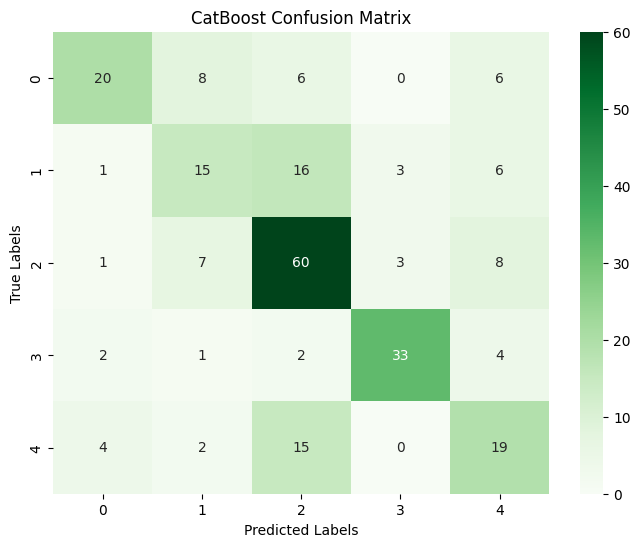

SVM Confusion Matrix

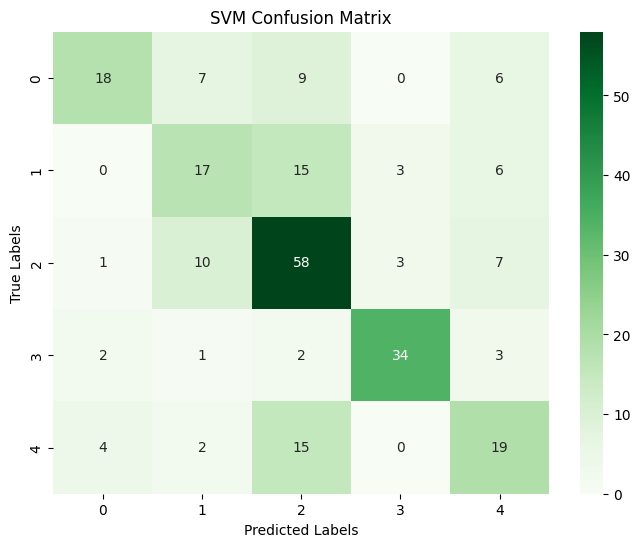

Based on the comparison of the confusion matrices, CatBoost generally performs better than SVM in terms of accuracy and misclassification rate. CatBoost correctly classifies more samples overall, with a notable advantage in Class 2, where it achieves 60 correct classifications compared to SVM’s 58. For Class 3, however, SVM slightly outperforms CatBoost with 34 correct classifications versus 33. When analyzing misclassification rates, CatBoost exhibits a more balanced distribution of errors, making it a more robust model for generalization. SVM, on the other hand, tends to have higher variance and misclassifies more samples, particularly in Class 1, where it has 10 errors compared to CatBoost’s 7. While SVM performs well for specific cases like Class 3, its overall stability is lower than that of CatBoost. 

    
##  Which Model Performed Best?  

After comparing **CatBoost** and **SVM**, we **chose CatBoost** as the better model because:  

### ✅ **Why CatBoost Wins?**  
✔ **Higher accuracy** – CatBoost achieved **61%**, slightly outperforming SVM (60%).  
✔ **Better recall** – It identified more correct cases in most classes, making it more reliable.  
✔ **Handles categorical data efficiently** – CatBoost processes categorical variables **natively**, unlike SVM, which requires extra encoding.  
✔ **Prevents overfitting** – Built-in **early stopping** ensures it stops training when performance stops improving.  
  
